# **Import Libraries**

In [ ]:
# Pandas and Visualization
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import warnings

# Sklearn
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
# evaluation 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict



**Load Train and Test Datasets**


In [ ]:
train_data = pd.read_csv("/content/dataset/train.csv")
test_data = pd.read_csv("/content/dataset/test.csv")
datasets = [train_data, test_data]

print("The shape of the training dataset is {}.\n".format(train_data.shape))
print("The shape of the testing dataset is {}.\n".format(test_data.shape))

The shape of the training dataset is (891, 12).

The shape of the testing dataset is (418, 11).



In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Numerical data**

In [ ]:
train_data.describe(exclude=['O'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Categorical data**

In [ ]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nenkoff, Mr. Christo",male,1601,B96 B98,S
freq,1,577,7,4,644


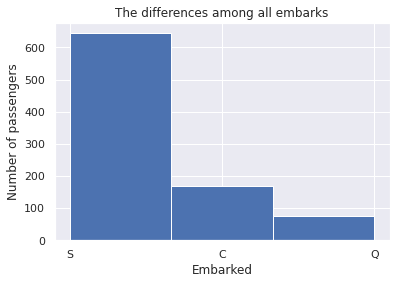

In [ ]:
plt.hist(train_data.loc[train_data['Embarked'].notnull(), 'Embarked'], bins=3)
plt.xlabel('Embarked')
plt.ylabel('Number of passengers')
plt.title('The differences among all embarks')
plt.show()

**EDA**

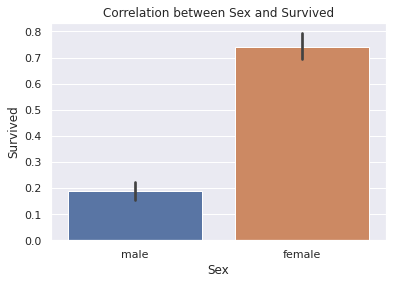

The ratio of survived men : %18.89
The ratio of survived women : %74.2


In [ ]:
ax = sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title('Correlation between Sex and Survived')
plt.show()

Men = train_data[train_data['Sex'] == 'male']['Sex'].count()
survived_men = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)]['Sex'].count()
Women = train_data[train_data['Sex'] == 'female']['Sex'].count()
survived_women = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]['Sex'].count()

print('The ratio of survived men : '+ '%' +str(round(100*survived_men / Men, 2)) )
print('The ratio of survived women : '+ '%' +str(round(100*survived_women / Women, 2)) )

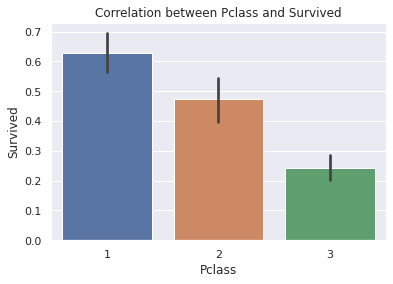

In [ ]:
ax = sns.barplot(data= train_data, x= 'Pclass', y='Survived')
plt.title('Correlation between Pclass and Survived')
plt.show()

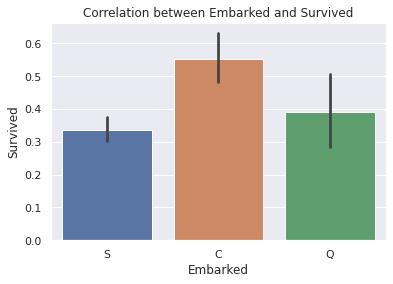

In [ ]:
ax = sns.barplot(data= train_data, x= 'Embarked', y='Survived')
plt.title('Correlation between Embarked and Survived')
plt.show()

In [ ]:
train_data['bands'] = pd.qcut(train_data['Fare'], 3)
train_data['bands'].unique()

[(-0.001, 8.662], (26.0, 512.329], (8.662, 26.0]]
Categories (3, interval[float64]): [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]

In [ ]:
for dataset in datasets:
    
    dataset.loc[(-0.001 < dataset['Fare']) & (dataset['Fare'] <= 8.662), 'Fare'] = 0
    dataset.loc[(8.662 < dataset['Fare']) & (dataset['Fare'] <= 26.0), 'Fare'] = 1
    dataset.loc[(26.0 < dataset['Fare']) & (dataset['Fare'] <= 513.329), 'Fare'] = 2
    
   
    dataset['Fare'] = dataset.loc[dataset['Fare'].notnull(), 'Fare'].astype(int)

In [ ]:
print(train_data['Fare'].unique())
print(test_data['Fare'].unique())

[0 2 1]
[ 0.  1.  2. nan]


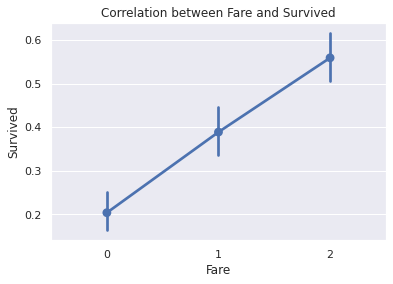

In [ ]:
ax = sns.pointplot(data=train_data, x='Fare', y='Survived')
plt.title('Correlation between Fare and Survived')
plt.show()

In [ ]:
train_data['AgeBands'] = pd.qcut(train_data['Age'], 5)
train_data['AgeBands'].unique()

[(19.0, 25.0], (31.8, 41.0], (25.0, 31.8], NaN, (41.0, 80.0], (0.419, 19.0]]
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] <
                                    (41.0, 80.0]]

In [ ]:
for dataset in datasets:
    
    dataset.loc[dataset['Age'] <= 19, 'Age'] = 10
    dataset.loc[(19 < dataset['Age'] ) & (dataset['Age'] <= 25), 'Age' ] = 20
    dataset.loc[(25.0 < dataset['Age'] ) & (dataset['Age'] <= 31.8), 'Age' ] = 30
    dataset.loc[(31.8 < dataset['Age'] ) & (dataset['Age'] <= 41.0), 'Age' ] = 40
    dataset.loc[(41.0 < dataset['Age'] ) & (dataset['Age'] <= 80.0), 'Age' ] = 50
    
    dataset['Age'] = dataset.loc[dataset['Age'].notnull(), 'Age'].astype(int)

In [ ]:
print(train_data['Age'].unique())
print(test_data['Age'].unique())

[20. 40. 30. nan 50. 10.]
[40. 50. 30. 20. 10. nan]


Text(0.5, 1.0, 'Correlation between Age and Survived')

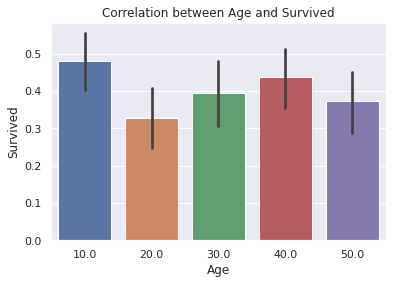

In [ ]:
sns.barplot(data= train_data, x='Age', y='Survived')
plt.title('Correlation between Age and Survived')

In [ ]:
train_data.loc[(train_data['Age'] == 10), 'Age'] = 2
train_data.loc[(train_data['Age'] == 20) | (train_data['Age'] == 50), 'Age'] = 0
train_data.loc[(train_data['Age'] == 30) | (train_data['Age'] == 40), 'Age'] = 1

test_data.loc[(test_data['Age'] == 10), 'Age'] = 2
test_data.loc[(test_data['Age'] == 20) | (test_data['Age'] == 50), 'Age'] = 0
test_data.loc[(test_data['Age'] == 30) | (test_data['Age'] == 40), 'Age'] = 1


# Let's give those null values the median of ages in their pclass
for pclass in range(1, 4):
    
    train_data.loc[ (train_data['Pclass'] == pclass) & (train_data['Age'].isnull()), 'Age'] = train_data.loc[ (train_data['Pclass'] == pclass) & (train_data['Age'].notnull()), 'Age' ].median()
    test_data.loc[ (test_data['Pclass'] == pclass) & (test_data['Age'].isnull()), 'Age'] = test_data.loc[ (test_data['Pclass'] == pclass) & (test_data['Age'].notnull()), 'Age' ].median()

In [ ]:
parchValues = train_data['Parch'].unique()
SibSpValues = train_data['SibSp'].unique()

In [ ]:
train_data[ ['Parch', 'Survived'] ].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
train_data[ ['SibSp', 'Survived'] ].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Drop PassengerId column

In [ ]:
print('The shape before deletion for train data: ' + str(train_data.shape))
print('The shape before deletion for test data: ' + str(test_data.shape))


train_data = train_data.drop(['Ticket', 'PassengerId', 'Cabin', 'AgeBands'], axis=1)
test_data = test_data.drop(['Ticket', 'PassengerId', 'Cabin'], axis=1)
    
print('\nThe shape after deletion for train data: ' + str(train_data.shape))
print('The shape after deletion for test data: ' + str(test_data.shape))

The shape before deletion for train data: (891, 9)
The shape before deletion for test data: (418, 8)


KeyError: ignored

In [ ]:
train_data.loc[train_data['Embarked'].isnull(), 'Embarked'] = 'S'
test_data.loc[test_data['Fare'].isnull(), 'Fare'] = test_data['Fare'].median()

test_data['Fare'] = test_data['Fare'].astype(int)

In [ ]:
sexMap = {'male':0.1889, 'female':0.742}
embarkedMap = {'S':0.34, 'Q':0.38, 'C':0.55}
PclassMap = {3:0.22, 2:0.46, 1:0.62}

# Some feature engineering
train_data['isAlone'] = 0
train_data.loc[ (train_data['SibSp'] == 0) & (train_data['Parch'] == 0) , 'isAlone'] = 1

test_data['isAlone'] = 0
test_data.loc[ (test_data['SibSp'] == 0) & (test_data['Parch'] == 0) , 'isAlone'] = 1




# For trainning data
train_data['Embarked'] = train_data['Embarked'].map(embarkedMap)
train_data['Sex'] = train_data['Sex'].map(sexMap)
train_data['Pclass'] = train_data['Pclass'].map(PclassMap)
    
train_data.loc[train_data['SibSp'] >= 3, 'SibSp'] = 0
train_data.loc[train_data['SibSp'] < 3, 'SibSp'] = 1
    
    
train_data.loc[train_data['Parch'] >= 4, 'Parch'] = 0
train_data.loc[(train_data['Parch'] > 0) & (train_data['Parch'] < 4), 'Parch'] = 1



# For test data
test_data['Embarked'] = test_data['Embarked'].map(embarkedMap)
test_data['Sex'] = test_data['Sex'].map(sexMap) 
test_data['Pclass'] = test_data['Pclass'].map(PclassMap)
    
test_data.loc[test_data['SibSp'] >= 3, 'SibSp'] = 0
test_data.loc[test_data['SibSp'] < 3, 'SibSp'] = 1 
    
test_data.loc[test_data['Parch'] >= 4, 'Parch'] = 0
test_data.loc[(test_data['Parch'] > 0) & (test_data['Parch'] < 4), 'Parch'] = 1

In [ ]:
train_data['Title'] = train_data.Name.str.extract(r'(\w+)\.')
train_data = train_data.drop('Name', axis=1)

test_data['Title'] = test_data.Name.str.extract(r'(\w+)\.')
test_data = test_data.drop('Name', axis= 1)

train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
titles = train_data['Title'].unique()
numDict = dict()
for title in titles:
    numDict[title] = train_data.loc[ train_data['Title'] == title, 'Title' ].count()

df = train_data[ ['Title', 'Survived'] ].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending= False)
df['Repeated'] = [numDict[title] for title in df['Title']]
df

,Title,Survived,Repeated
16,Sir,1.000000,1
2,Countess,1.000000,1
14,Ms,1.000000,1
11,Mme,1.000000,1
6,Lady,1.000000,1
10,Mlle,1.000000,2
13,Mrs,0.792000,125
9,Miss,0.697802,182
8,Master,0.575000,40
1,Col,0.500000,2


In [ ]:
train_data = train_data.replace(['Countess', 'Ms', 'Mme', 'Lady', 'Dona', 'Mlle', 'Mrs', 'Miss', 'Master', 'Dr'], 2)
test_data = test_data.replace(['Countess', 'Ms', 'Mme', 'Lady', 'Dona', 'Mlle', 'Mrs', 'Miss', 'Master', 'Dr'], 2)

# Nutral correlation
train_data = train_data.replace(['Col', 'Major', 'Sir', 'Capt'], 1)
test_data = test_data.replace(['Col', 'Major', 'Sir', 'Capt'], 1)

# Negative correlation
train_data = train_data.replace(['Rev', 'Mr', 'Jonkheer', 'Don'], 0)
test_data = test_data.replace(['Rev', 'Mr', 'Jonkheer', 'Don'], 0)

# Models Apply

In [ ]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [ ]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

X_test  = test_data.drop
# feels like Parch feature doesn't have any impact 
X_test = test_data.drop("Parch", axis=1)
Y_test = test_data

**Logistic Regression**

In [200]:
log_model = LogisticRegression()
log_model.fit(X, y)
log_model_score = round(log_model.score(X, y) * 100, 2)
print(str(log_model_score) + '%')

80.25%


Confusion Matrix

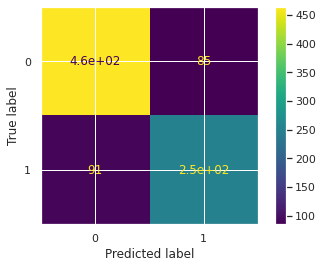

In [205]:
# plotting the confusion matrix
plot_confusion_matrix(log_model, X, y)
plt.show()

**ROC Curve**

In [ ]:
y_scores = log_model.predict_proba(X)
y_scores = y_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)

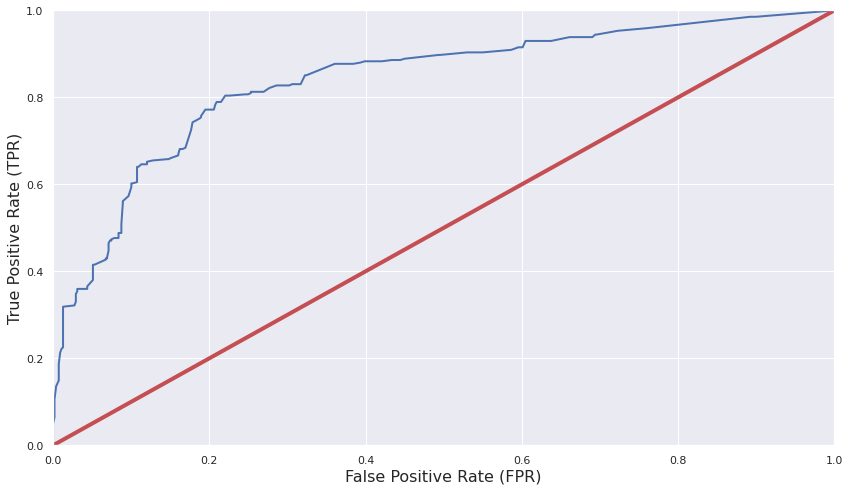

In [181]:
plt.figure(figsize=(14, 8))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

**Naive Bayes**

In [201]:

nb_model = GaussianNB()
nb_model.fit(X, y)
nb_model_score = round(nb_model.score(X, y) * 100, 2)
print(str(nb_model_score) + '%')


78.9%


Confusion Matrix

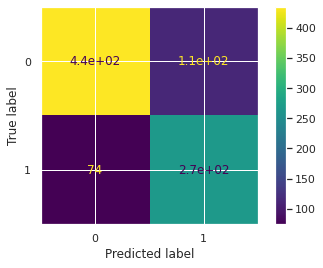

In [ ]:
plot_confusion_matrix(nb_model, X, y)
plt.show()

ROC Curve

In [ ]:
y_scores = nb_model.predict_proba(X)
y_scores = y_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)

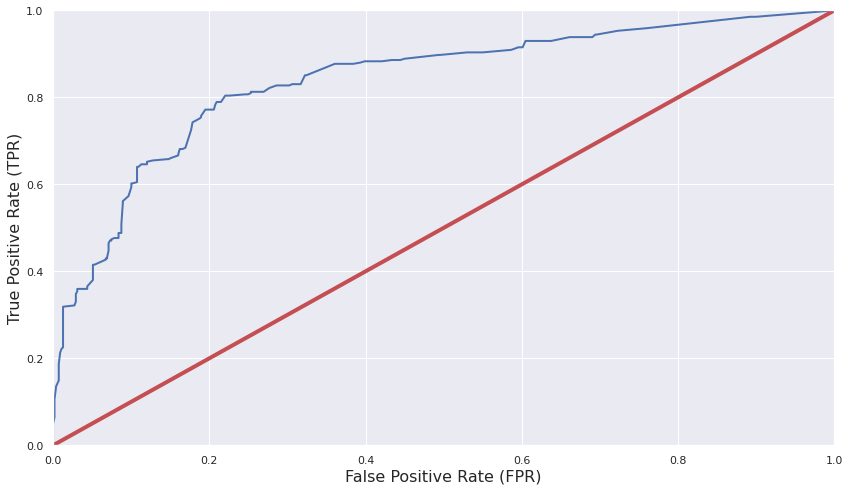

In [182]:
plt.figure(figsize=(14, 8))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

**SVM**

In [202]:
svm_model = svm.SVC(probability=True)
svm_model.fit(X, y)
svm_model_score = round(svm_model.score(X, y) * 100, 2)
print(str(svm_model_score) + '%')

82.04%


Confusion Matrix

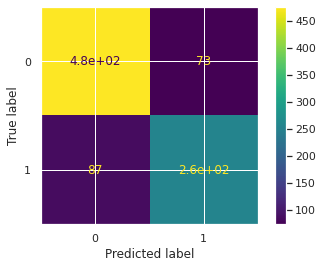

In [189]:
plot_confusion_matrix(svm_model, X, y)
plt.show()

ROC Curve

In [183]:
y_scores = svm_model.predict_proba(X)
y_scores = y_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)

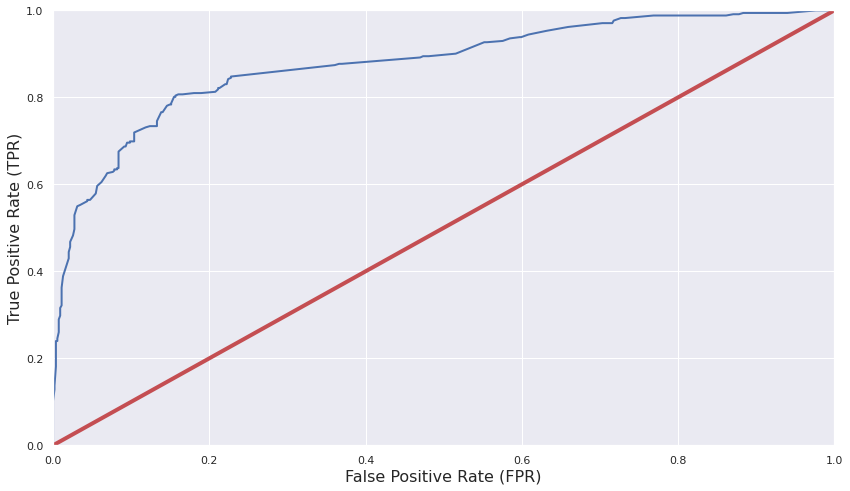

In [184]:
plt.figure(figsize=(14, 8))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

**Decission Tree**

In [203]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)
tree_model_score = round(tree_model.score(X, y) * 100, 2)
print(str(tree_model_score) + '%')

87.21%


Confusion Matrix

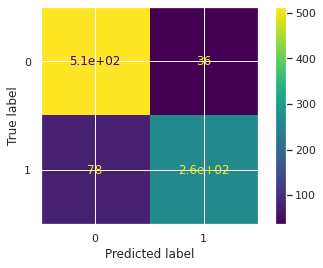

In [190]:
plot_confusion_matrix(tree_model, X, y)
plt.show()

ROC Curve

In [185]:
y_scores = tree_model.predict_proba(X)
y_scores = y_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)

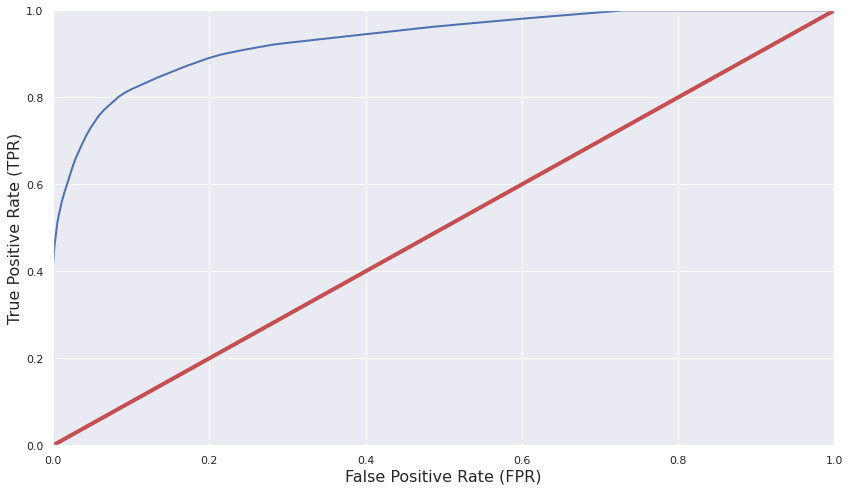

In [186]:
plt.figure(figsize=(14, 8))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

**Random Forest**

In [204]:
forest_model = RandomForestClassifier()
forest_model.fit(X, y)
forest_model_score = round(forest_model.score(X, y) * 100, 2)
print(str(forest_model_score) + '%')

87.21%


Confusion Matrix

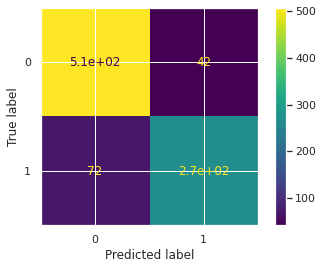

In [191]:
plot_confusion_matrix(forest_model, X, y)
plt.show()

ROC Curve

In [187]:
y_scores = forest_model.predict_proba(X)
y_scores = y_scores[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)

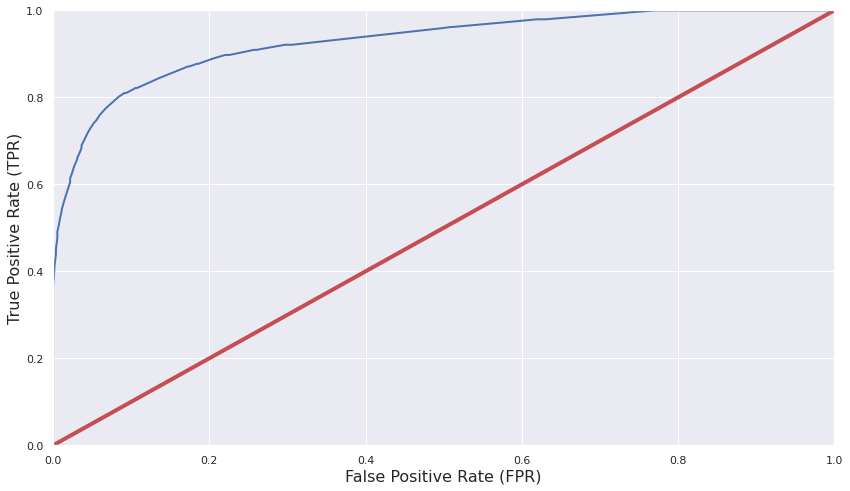

In [188]:
plt.figure(figsize=(14, 8))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [197]:

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Machines', 'Decision Tree', 'Random Forest'], 
    'Score': [log_model_score, nb_model_score, svm_model_score, tree_model_score, forest_model_score]})

result_df = results.sort_values(by='Score', ascending=True)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
78.90,Naive Bayes
80.25,Logistic Regression
82.04,Support Vector Machines
87.21,Decision Tree
87.21,Random Forest
